In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

!pip install gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf

from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\long\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('10K_cleaned_suicide_data.csv')
df

,Unnamed: 0,lemmatized_text,class,pos_tags
0,0,ex wife threaten suicide recently leave wife g...,suicide,"[('ex', 'PROPN'), ('wife', 'NOUN'), ('threaten..."
1,1,weird get affect comp li ment come someone kno...,non-suicide,"[('weird', 'ADJ'), ('get', 'AUX'), ('affected'..."
2,2,finally almost never hear bad year ever swear ...,non-suicide,"[('finally', 'ADV'), ('almost', 'ADV'), ('neve..."
3,3,need help help cry hard,suicide,"[('need', 'VERB'), ('help', 'NOUN'), ('help', ..."
4,4,lose hello name adam struggle year afraid past...,suicide,"[('lost', 'VERB'), ('hello', 'INTJ'), ('name',..."
...,...,...,...,...
9994,9994,ti ame feel like would better dead anyone anyt...,suicide,"[('ti', 'VERB'), ('ames', 'NOUN'), ('feel', 'V..."
9995,9995,help plz got first reward aka gold say pre nui...,non-suicide,"[('help', 'AUX'), ('plz', 'INTJ'), ('got', 'VE..."
9996,9996,anyone wan na chat bit bored right hit via chat,non-suicide,"[('anyone', 'PRON'), ('wan', 'VERB'), ('na', '..."
9997,9997,bridge want die right see option,suicide,"[('bridge', 'PROPN'), ('want', 'VERB'), ('die'..."


In [3]:
df.lemmatized_text.isna().sum()

6

In [4]:
df['lemmatized_text'] = df['lemmatized_text'].fillna('')

for index, row in df.iterrows():
    if len(row['lemmatized_text']) < 3:
        df = df.drop(index)
df

,Unnamed: 0,lemmatized_text,class,pos_tags
0,0,ex wife threaten suicide recently leave wife g...,suicide,"[('ex', 'PROPN'), ('wife', 'NOUN'), ('threaten..."
1,1,weird get affect comp li ment come someone kno...,non-suicide,"[('weird', 'ADJ'), ('get', 'AUX'), ('affected'..."
2,2,finally almost never hear bad year ever swear ...,non-suicide,"[('finally', 'ADV'), ('almost', 'ADV'), ('neve..."
3,3,need help help cry hard,suicide,"[('need', 'VERB'), ('help', 'NOUN'), ('help', ..."
4,4,lose hello name adam struggle year afraid past...,suicide,"[('lost', 'VERB'), ('hello', 'INTJ'), ('name',..."
...,...,...,...,...
9994,9994,ti ame feel like would better dead anyone anyt...,suicide,"[('ti', 'VERB'), ('ames', 'NOUN'), ('feel', 'V..."
9995,9995,help plz got first reward aka gold say pre nui...,non-suicide,"[('help', 'AUX'), ('plz', 'INTJ'), ('got', 'VE..."
9996,9996,anyone wan na chat bit bored right hit via chat,non-suicide,"[('anyone', 'PRON'), ('wan', 'VERB'), ('na', '..."
9997,9997,bridge want die right see option,suicide,"[('bridge', 'PROPN'), ('want', 'VERB'), ('die'..."


In [5]:
df['processed_text'] = df.apply(lambda row: row.lemmatized_text.split(), axis=1)
df

,Unnamed: 0,lemmatized_text,class,pos_tags,processed_text
0,0,ex wife threaten suicide recently leave wife g...,suicide,"[('ex', 'PROPN'), ('wife', 'NOUN'), ('threaten...","[ex, wife, threaten, suicide, recently, leave,..."
1,1,weird get affect comp li ment come someone kno...,non-suicide,"[('weird', 'ADJ'), ('get', 'AUX'), ('affected'...","[weird, get, affect, comp, li, ment, come, som..."
2,2,finally almost never hear bad year ever swear ...,non-suicide,"[('finally', 'ADV'), ('almost', 'ADV'), ('neve...","[finally, almost, never, hear, bad, year, ever..."
3,3,need help help cry hard,suicide,"[('need', 'VERB'), ('help', 'NOUN'), ('help', ...","[need, help, help, cry, hard]"
4,4,lose hello name adam struggle year afraid past...,suicide,"[('lost', 'VERB'), ('hello', 'INTJ'), ('name',...","[lose, hello, name, adam, struggle, year, afra..."
...,...,...,...,...,...
9994,9994,ti ame feel like would better dead anyone anyt...,suicide,"[('ti', 'VERB'), ('ames', 'NOUN'), ('feel', 'V...","[ti, ame, feel, like, would, better, dead, any..."
9995,9995,help plz got first reward aka gold say pre nui...,non-suicide,"[('help', 'AUX'), ('plz', 'INTJ'), ('got', 'VE...","[help, plz, got, first, reward, aka, gold, say..."
9996,9996,anyone wan na chat bit bored right hit via chat,non-suicide,"[('anyone', 'PRON'), ('wan', 'VERB'), ('na', '...","[anyone, wan, na, chat, bit, bored, right, hit..."
9997,9997,bridge want die right see option,suicide,"[('bridge', 'PROPN'), ('want', 'VERB'), ('die'...","[bridge, want, die, right, see, option]"


## NMF with Gensim

https://www.kaggle.com/code/rockystats/topic-modelling-using-nmf
https://www.kaggle.com/code/divyapatel4/topic-modelling-and-visualization-using-nmf

In [6]:

def topic_table(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        t = (topic_idx)
        topics[t] = [feature_names[i] for i in top_words(topic, n_top_words)]
    return pd.DataFrame(topics)


In [7]:
texts = df['processed_text']
texts = [doc for doc in texts if len(doc)>1]

tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(texts)

In [49]:
# Use Gensim's NMF to get the best num of topics via coherence score
texts = df['processed_text']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

corpus = [doc for doc in corpus if len(doc)>1] # will be useful later for vis

# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(5, 75 + 1, 5))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []


c:\Users\long\anaconda3\lib\site-packages\gensim\models\nmf.py:578: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
c:\Users\long\anaconda3\lib\site-packages\gensim\models\nmf.py:607: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
c:\Users\long\anaconda3\lib\site-packages\gensim\models\nmf.py:620: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
c:\Users\long\anaconda3\lib\site-packages\gensim\models\nmf.py:620: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
c:\U

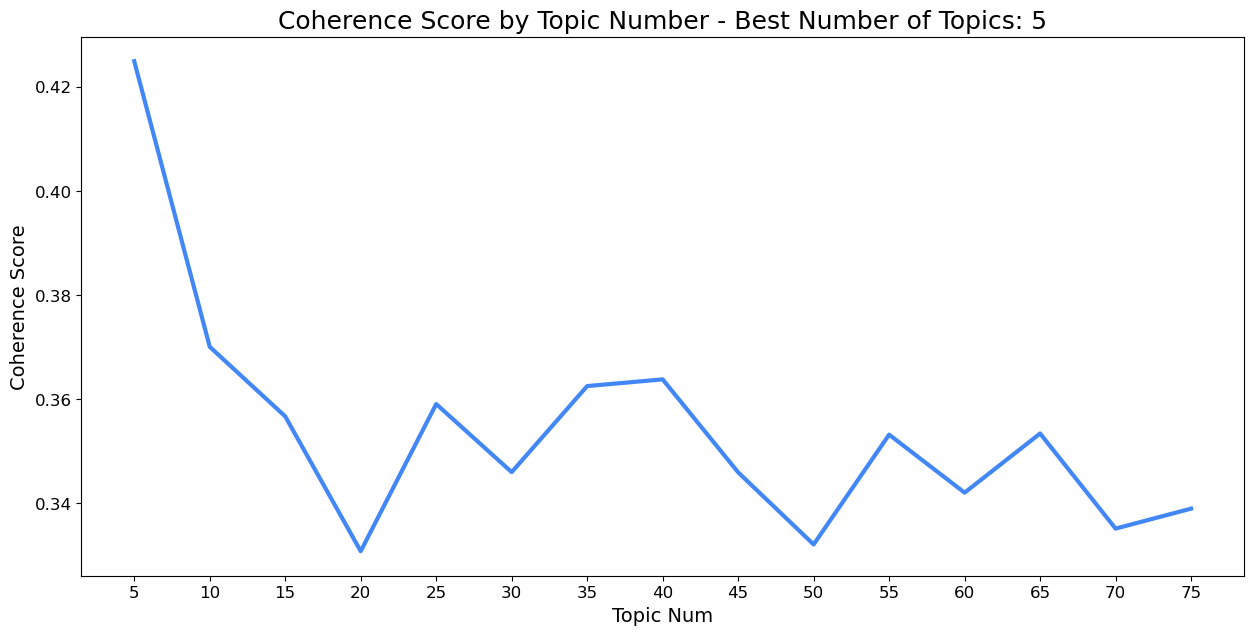

In [50]:

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [6]:
best_num_topics=5

In [30]:
!pip install pyLDAvis --upgrade
!pip install sklearn --upgrade

  Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
  Using cached pandas-2.2.1-cp310-cp310-win_amd64.whl (11.6 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\long\\anaconda3\\Lib\\site-packages\\~andas\\_libs\\algos.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [7]:
!pip install pyLDAvis==3.4.1

  Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
  Attempting uninstall: pyLDAvis
    Found existing installation: pyLDAvis 2.1.2
    Uninstalling pyLDAvis-2.1.2:
      Successfully uninstalled pyLDAvis-2.1.2


In [63]:
import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.sklearn

In [64]:
nmf = Nmf(
        corpus=corpus,
        num_topics=best_num_topics,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )

c:\Users\long\anaconda3\lib\site-packages\gensim\models\nmf.py:578: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
c:\Users\long\anaconda3\lib\site-packages\gensim\models\nmf.py:607: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
c:\Users\long\anaconda3\lib\site-packages\gensim\models\nmf.py:620: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
c:\Users\long\anaconda3\lib\site-packages\gensim\models\nmf.py:620: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
c:\U

In [65]:
vis_nmf = pyLDAvis.gensim.prepare(nmf, corpus, dictionary)
vis_nmf

AttributeError: 'Nmf' object has no attribute 'inference'

## Summarizing Topics

In [7]:
## defining all utilty functions - needed for Data cleaning and processing

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
import nltk

# Contraction map
c_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "I would",
    "i'd've": "I would have",
    "i'll": "I will",
    "i'll've": "I will have",
    "i'm": "I am",
    "i've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'alls": "you alls",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you you will",
    "you'll've": "you you will have",
    "you're": "you are",
    "you've": "you have"
}

# Compiling the contraction dict
c_re = re.compile('(%s)' % '|'.join(c_dict.keys()))

# List of stop words
add_stop = ['said', 'say', '...', 'like', 'cnn', 'ad']
stop_words = ENGLISH_STOP_WORDS.union(add_stop)

# List of punctuation
punc = list(set(string.punctuation))


# Splits words on white spaces (leaves contractions intact) and splits out
# trailing punctuation
def casual_tokenizer(text):
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens


def expandContractions(text, c_re=c_re):
    def replace(match):
        return c_dict[match.group(0)]
    return c_re.sub(replace, text)


def process_text(text):
    text = casual_tokenizer(text)
    text = [each.lower() for each in text]
    text = [re.sub('[0-9]+', '', each) for each in text]
    text = [expandContractions(each, c_re=c_re) for each in text]
    text = [SnowballStemmer('english').stem(each) for each in text]
    text = [w for w in text if w not in punc]
    text = [w for w in text if w not in stop_words]
    text = [each for each in text if len(each) > 1]
    text = [each for each in text if ' ' not in each]
    return text


def top_words(topic, n_top_words):
    return topic.argsort()[:-n_top_words - 1:-1]  


def topic_table(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        t = (topic_idx)
        topics[t] = [feature_names[i] for i in top_words(topic, n_top_words)]
    return pd.DataFrame(topics)


def whitespace_tokenizer(text): 
    pattern = r"(?u)\b\w\w+\b" 
    tokenizer_regex = RegexpTokenizer(pattern)
    tokens = tokenizer_regex.tokenize(text)
    return tokens


# Funtion to remove duplicate words
def unique_words(text): 
    ulist = []
    [ulist.append(x) for x in text if x not in ulist]
    return ulist


def word_count(text):
    return len(str(text).split(' '))

In [8]:
# Now use the number of topics with the 
# highest coherence score to run the 
# sklearn nmf model

texts = list(df['processed_text'])

# Create the tfidf weights
tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(texts)

# Save the feature names for later to create topic summaries
tfidf_fn = tfidf_vectorizer.get_feature_names_out()

# Run the nmf model
nmf = NMF(
    n_components=best_num_topics,
    init='nndsvd',
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    alpha_W=0.0,
    tol=1e-4,
    random_state=42
).fit(tfidf)

In [9]:
# Use the top words for each cluster by tfidf weight
# to create 'topics'

# Getting a df with each topic by document
docweights = nmf.transform(tfidf_vectorizer.transform(texts))

n_top_words = 8

topic_df = topic_table(
    nmf,
    tfidf_fn,
    n_top_words
).T

# Cleaning up the top words to create topic summaries
topic_df['topics'] = topic_df.apply(lambda x: [' '.join(x)], axis=1) # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets
topic_df['topics'] = topic_df['topics'].apply(lambda x: whitespace_tokenizer(x)) # tokenize
topic_df['topics'] = topic_df['topics'].apply(lambda x: unique_words(x))  # Removing duplicate words
topic_df['topics'] = topic_df['topics'].apply(lambda x: [' '.join(x)])  # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets

topic_df.head()

,0,1,2,3,4,5,6,7,topics
0,want,die,fuck,life,kill,anymore,live,not,want die fuck life kill anymore live not
1,filler,filler filler,post,amp,bored,award,horny,fill,filler post amp bored award horny fill
2,na,wan na,wan,anyone wan,anyone,talk,na talk,chat,na wan anyone talk chat
3,get,go,ti,year,say,would,friend,know,get go ti year say would friend know
4,feel,like,feel like,know,really,ti,people,even,feel like know really ti people even


In [10]:
# Create a df with only the created topics and topic num
topic_df = topic_df['topics'].reset_index()
topic_df.columns = ['topic_num', 'topics']

topic_df

,topic_num,topics
0,0,want die fuck life kill anymore live not
1,1,filler post amp bored award horny fill
2,2,na wan anyone talk chat
3,3,get go ti year say would friend know
4,4,feel like know really ti people even


In [12]:
import pyLDAvis.lda_model

vis_nmf = pyLDAvis.lda_model.prepare(nmf, tfidf, tfidf_vectorizer)
vis_nmf

c:\Users\long\anaconda3\lib\site-packages\pyLDAvis\lda_model.py:26: RuntimeWarning: invalid value encountered in divide
  return dists / dists.sum(axis=1)[:, None]
c:\Users\long\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\long\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\long\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.110710  0.004115       1        1  50.834046
0      0.201505  0.090998       2        1  22.331113
4      0.177496  0.052847       3        1  19.462951
2     -0.099061 -0.294842       4        1   6.545192
1     -0.390650  0.146883       5        1   0.826698, topic_info=         Term        Freq       Total Category  logprob  loglift
1383   filler  159.000000  159.000000  Default  30.0000  30.0000
1317     feel  475.000000  475.000000  Default  29.0000  29.0000
2837       na  248.000000  248.000000  Default  28.0000  28.0000
4652   wan na  246.000000  246.000000  Default  27.0000  27.0000
4651      wan  246.000000  246.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
641   comment    0.874023   32.964869   Topic5  -6.2548   1.1654
203    anyone    0.972391  147.836887   Topic5  -6.1482  -0

In [13]:
pyLDAvis.display(vis_nmf)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize(text, maxx_features, ngram_from, ngram_to):
    
    vectorizer = TfidfVectorizer(max_df=0.7, min_df=5, max_features=maxx_features, ngram_range=(ngram_from, ngram_to))
    X = vectorizer.fit_transform(text)
    return X,vectorizer

In [15]:
text = []

for x in texts:
    text.append(' '.join(x))

max_features = 2**12
Xc,Vecc = vectorize(text, max_features,1,2)

nmf = NMF(n_components=5, random_state=42)
W = nmf.fit_transform(Xc)
H = nmf.components_


c:\Users\long\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [ ]:
!pip install pyLDAvis==3.2.0

  Using cached pyLDAvis-3.2.0-py2.py3-none-any.whl
  Attempting uninstall: pyLDAvis
    Found existing installation: pyLDAvis 3.4.1
    Uninstalling pyLDAvis-3.4.1:
      Successfully uninstalled pyLDAvis-3.4.1

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [16]:
vis = pyLDAvis.sklearn.prepare(nmf, Xc, Vecc)
vis

c:\Users\long\anaconda3\lib\site-packages\pyLDAvis\sklearn.py:26: RuntimeWarning: invalid value encountered in divide
  return dists / dists.sum(axis=1)[:, None]


ValueError: Must pass 2-d input. shape=(5, 1, 4096)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cc725fbb-272a-46d8-8511-cf7b3f199438' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>